# Einführung

Dieses Notebook vermittelt Basiswissen zur Zeitreihenanalyse.

Eine knapp-gehaltene Englischsprachige Einführung ist hierbei:

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

# Komponenten einer Zeitreihe

- Trend
- Saison
- Residuen

Siehe auch: https://de.wikipedia.org/wiki/Trendmodell

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

## Zeitreihe nur mit Trend

Datensätze sind von

https://github.com/selva86/datasets

In [16]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv"
t = pd.read_csv(url, parse_dates=['date'], index_col='date')
t.to_csv("guinearice.csv")

In [17]:
t.shape

(40, 1)

In [18]:
t.head(3)

,value
date,
1970-01-01,0.311405
1971-01-01,0.325180
1972-01-01,0.339565


In [19]:
t.columns

Index(['value'], dtype='object')

In [20]:
t.dtypes

value    float64
dtype: object

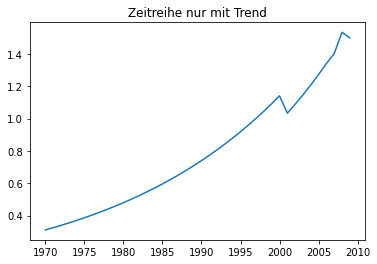

In [23]:
plt.plot(t)
plt.title("Zeitreihe nur mit Trend")
plt.show()

## Zeitreihe mit Saisonalität

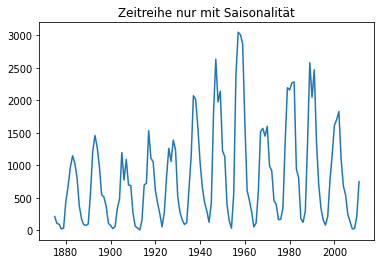

In [24]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv"
t = pd.read_csv(url, parse_dates=['date'], index_col='date')
t.to_csv("sunspotarea.csv")
plt.plot(t)
plt.title("Zeitreihe nur mit Saisonalität")
plt.show()

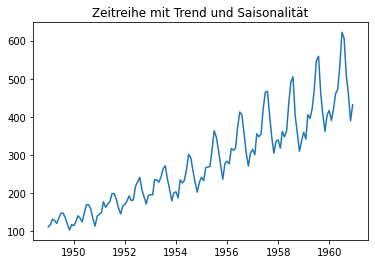

In [25]:
## Zeitreihe 

url = "https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv"
t = pd.read_csv(url, parse_dates=['date'], index_col='date')
t.to_csv("AirPassengers.csv")
plt.plot(t)
plt.title("Zeitreihe mit Trend und Saisonalität")
plt.show()

# Zerlegung einer Zeitreihe in ihre Komponenten

Dazu verwenden wir die Python Bibliothek `statsmodels`:

https://www.statsmodels.org/stable/index.html

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
t

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [78]:
decomposition = seasonal_decompose(t['value'], model='additive', extrapolate_trend='freq')
#decomposition = seasonal_decompose(t['value'], model="multiplicative", extrapolate_trend='freq')

In [79]:
type(decomposition)

statsmodels.tsa.seasonal.DecomposeResult

In [80]:
decomposition

In [81]:
decomposition.trend

date
1949-01-01    118.588481
1949-02-01    119.734169
1949-03-01    120.879856
1949-04-01    122.025544
1949-05-01    123.171232
                 ...    
1960-08-01    486.355575
1960-09-01    490.716443
1960-10-01    495.077312
1960-11-01    499.438180
1960-12-01    503.799048
Name: trend, Length: 144, dtype: float64

In [82]:
decomposition.seasonal

date
1949-01-01   -23.790261
1949-02-01   -33.871846
1949-03-01    -1.682598
1949-04-01    -7.340572
1949-05-01    -4.866602
                ...    
1960-08-01    67.003453
1960-09-01    16.028936
1960-10-01   -22.317108
1960-11-01   -58.802042
1960-12-01   -32.773086
Name: seasonal, Length: 144, dtype: float64

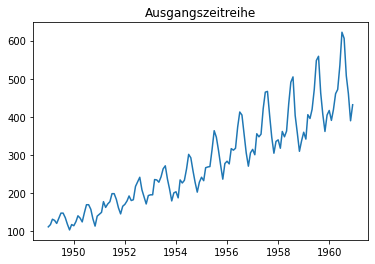

In [83]:
plt.plot(t)
plt.title("Ausgangszeitreihe")
plt.show()

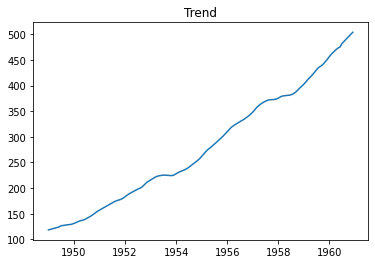

In [84]:
plt.plot(decomposition.trend)
plt.title("Trend")
plt.show()

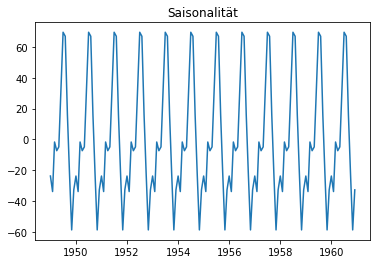

In [85]:
plt.plot(decomposition.seasonal)
plt.title("Saisonalität")
plt.show()

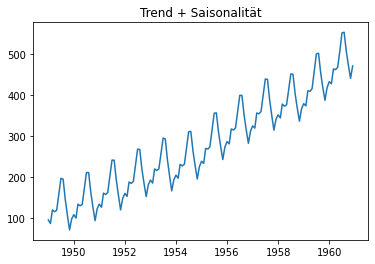

In [87]:
plt.plot(decomposition.trend + decomposition.seasonal)
#plt.plot(decomposition.trend * decomposition.seasonal)
plt.title("Trend + Saisonalität")
plt.show()

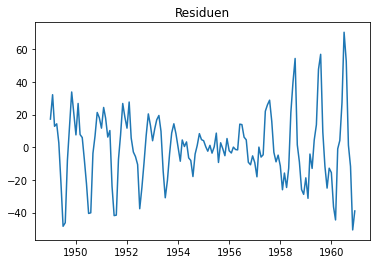

In [88]:
plt.plot(decomposition.resid)
plt.title("Residuen")
plt.show()

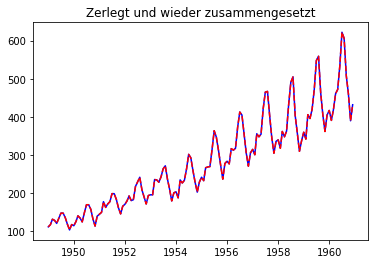

In [90]:
plt.plot(decomposition.trend + decomposition.seasonal + decomposition.resid, "blue")
#plt.plot(decomposition.trend * decomposition.seasonal * decomposition.resid, "blue")
plt.plot(t, "r--")
plt.title("Zerlegt und wieder zusammengesetzt")
plt.show()

# Zeitreihe behandeln

## Zeitreihe ohne Trend

In [52]:
t

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [53]:
decomposition.trend

date
1949-01-01    118.588481
1949-02-01    119.734169
1949-03-01    120.879856
1949-04-01    122.025544
1949-05-01    123.171232
                 ...    
1960-08-01    486.355575
1960-09-01    490.716443
1960-10-01    495.077312
1960-11-01    499.438180
1960-12-01    503.799048
Name: trend, Length: 144, dtype: float64

In [91]:
t["value"] - decomposition.trend
#t["value"] / decomposition.trend

date
1949-01-01     -6.588481
1949-02-01     -1.734169
1949-03-01     11.120144
1949-04-01      6.974456
1949-05-01     -2.171232
                 ...    
1960-08-01    119.644425
1960-09-01     17.283557
1960-10-01    -34.077312
1960-11-01   -109.438180
1960-12-01    -71.799048
Length: 144, dtype: float64

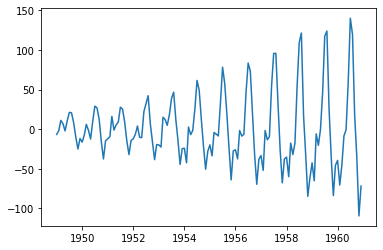

In [93]:
plt.plot(t["value"] - decomposition.trend)
plt.show()

## Zeitreihe ohne Saisonalität

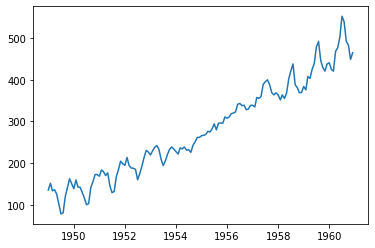

In [94]:
plt.plot(t["value"] - decomposition.seasonal)
#plt.plot(t["value"] / decomposition.seasonal)
plt.show()

# Stationarität

Stationäre Zeitreihen haben keinen Trend.

Trends können linearer, polyonmialer oder auch exponentieller Natur sein.

Eine nicht-stationäre Zeitreihe kann hierbei zu einer stationärer Zeitreihe gemacht werden, wenn ein linearer Trend vorliegt und dieser durch Differenzenbildung eliminiert wird:

$x_t - x_{t-1}$

Eine Zeitreihe stationär zu machen ist oft ein wichtiger erster Schritt, da viele Forecasting-Methoden für Zeitreihen davon ausgehen, dass die Zeitreihe stationär ist.

    "Stationarity means that the statistical properties of a time series i.e. mean, variance and covariance do not change over time."

# Testen ob eine Zeitreihe stationär ist

Hierzu gibt es den Augmented Dickey Fuller Test (ADF Test).

    "The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. So, if the P-Value in ADF test is less than the significance level (0.05), you reject the null hypothesis."

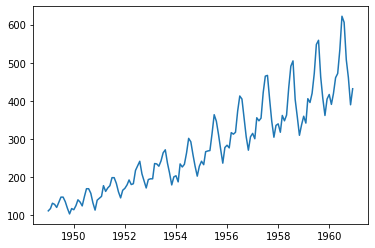

In [97]:
plt.plot(t)
plt.show()

In [122]:
from statsmodels.tsa.stattools import adfuller

def test_for_stationarity(ts):
    result = adfuller(ts, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')

    p_value = result[1]
    print(f'p-value: {p_value}')
    if p_value < 0.05:
        print("time series is stationary (has no trend)")
        return True
    else:
        print("time series is non-stationary (has a trend)")
        return False    

In [123]:
test_for_stationarity(t.values)

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
time series is non-stationary (has a trend)


False

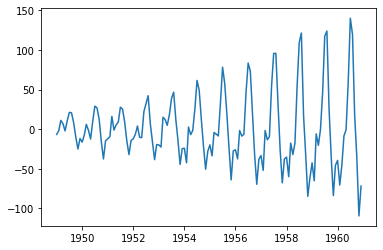

In [124]:
t2 = t["value"] - decomposition.trend
plt.plot(t2)
plt.show()

In [126]:
test_for_stationarity(t2.values)

ADF Statistic: -3.5513658707356544
p-value: 0.0067618450724023504
time series is stationary (has no trend)


True

# Autokorrelationsfunktion

Kann helfen, saisonale Rythmen in einer Zeitreihe zu erkennen.

    "But when there is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window."
    
Die Formel der Stichproben-Autokorrelationsfunktion gibt es hier:

https://de.wikipedia.org/wiki/Autokorrelation#Sch%C3%A4tzung

In [127]:
from pandas.plotting import autocorrelation_plot

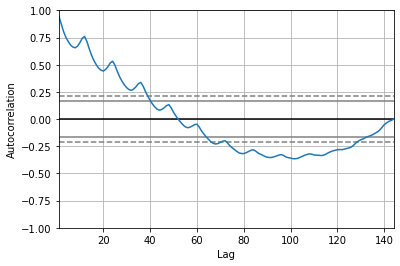

In [129]:
autocorrelation_plot(t.values)
plt.show()

autocorrelation_plot(t2.values)
plt.show()

# Einführungsvideos zu AR, MA, ARMA, ARIMA, Seasonal ARIMA Modellen

Ganze Videoreihe:
https://www.youtube.com/watch?v=HhvTlaN06AM&list=RDCMUCUcpVoi5KkJmnE3bvEhHR0Q&start_radio=1&rv=HhvTlaN06AM&t=431

AR-Modell: https://www.youtube.com/watch?v=5-2C4eO4cPQ

MA-Modell: https://www.youtube.com/watch?v=voryLhxiPzE

ARMA-Modell: https://www.youtube.com/watch?v=HhvTlaN06AM

Autokorrelation & Partielle Autokorrelation: https://www.youtube.com/watch?v=DeORzP0go5I

ARIMA-Modell: https://www.youtube.com/watch?v=3UmyHed0iYE

SARIMA (Seasonal ARIMA-Modell): https://www.youtube.com/watch?v=WjeGUs6mzXg

Stationarity: https://www.youtube.com/watch?v=oY-j2Wof51c